 
### https://github.com/Qiskit/qiskit-tutorials/blob/master/community/algorithms/shor_algorithm.ipynb
 

In [3]:
!python --version

Python 3.7.4


### https://github.com/Qiskit/qiskit-tutorials/blob/master/qiskit/aer/aer_provider.ipynb

<font color='green'> 

## <div style="text-align: center"> _Alice laughed. “There’s no use trying,” she said: “one can’t believe impossible things._”</div>
    
## <div style="text-align: center">“_I daresay you haven’t had much practice,” said the Queen. “When I was your age, I always did it for half-an-hour a day. Why, some - times I’ve believed as many as six impossible things before break- fast._”</div>

##### <div style="text-align: center"> _Lewis Carroll, Through the Looking Glass, 1871_</div>
</font>

https://en.wikipedia.org/wiki/Shor%27s_algorithm

In [4]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/WVv5OAR4Nik?start=1&end=300",600,350)


> Shor's algorithm was demonstrated in 2001 by a group at IBM, which factored 15 into 3 and 5, using a quantum computer with 7 qubits.

> The problem we are trying to solve is that, given an integer N, we try to find another integer p between 1 and N that divides N.


> The algorithm is composed of two parts. The first part of the algorithm turns the factoring problem into the problem of finding the period of a function, and may be implemented classically. The second part finds the period using the quantum Fourier transform, and is responsible for the quantum speedup.


> Shor's period-finding algorithm relies heavily on the ability of a quantum computer to be in many states simultaneously. Physicists call this behaviour a "superposition" of states. To compute the period of a function f, we evaluate the function at all points simultaneously.

> Quantum physics does not allow us to access all this information directly, though. A measurement will yield only one of all possible values, destroying all others. Therefore we have to carefully transform the superposition to another state that will return the correct answer with high probability. This is achieved by the quantum Fourier transform.

> Shor thus had to solve three "implementation" problems. All of them had to be implemented "fast", which means that they can be implemented with a number of quantum gates that is polynomial in logN.

> Create a superposition of states.
This can be done by applying Hadamard gates to all qubits in the input register. Another approach would be to use the quantum Fourier transform.

> Implement the function f as a quantum transform.
To achieve this, Shor used repeated squaring for his modular exponentiation transformation.

> Perform a quantum Fourier transform.
By using controlled NOT gates and single qubit rotation gates Shor designed a circuit for the quantum Fourier transform that uses just O((logN)2) gates.

> After all these transformations a measurement will yield an approximation to the period r.


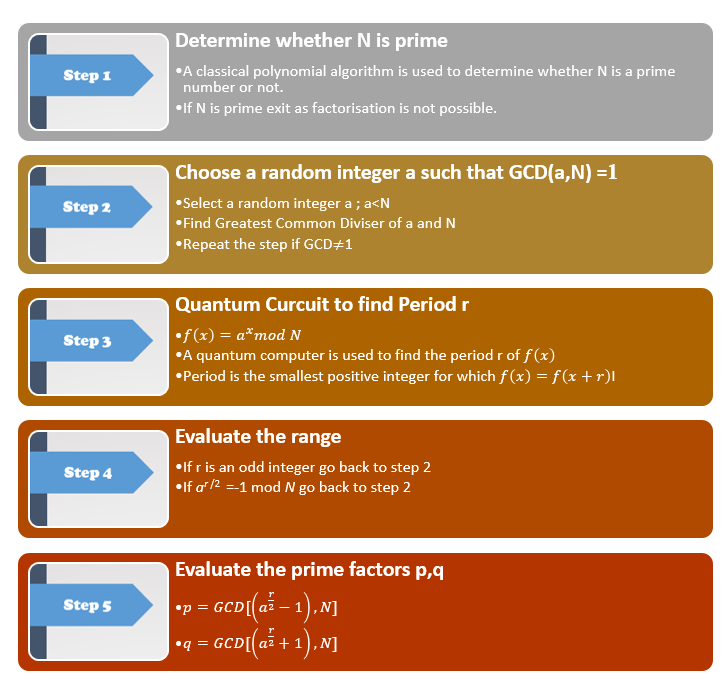

In [2]:
from IPython.display import Image
Image("SHORALGO.png")

### What is Quantum Computing

>Quantum computing applies the properties of quantum physics to process information. Operating with nanoscale components at temperatures colder than intergalactic space, quantum computing has the potential to solve some of the world’s toughest challenges. Taking only days or hours to solve problems that would take billions of years using today’s computers, quantum computers will enable new discoveries in the areas of healthcare, energy, environmental systems, smart materials, and beyond. Learn the basics of quantum computing in this quick overview.


### Background

>This section summarises the basic ingredients about factoring. Important distinction between exponential and polynomial bahaviour. Any integer number has a unique decomposition into a product of primes.

>Classical physics is causal; complete knowledge of the past allows computation of the future.  Likewise, complete knowledge of the future allows precise computation of the past.

>Not so in quantum physics.  Objects in quantum physics are neither particles nor waves; they are a strange combination of both. Given complete knowledge of the past, we can make only probabilistic predictions of the future.

>Shor's algorithm exploits interference to measure periodicity of arithmetic objects.

### Complexity of Factoring: Period Finding

>It has been known to mathmaticians since the 1970s that factoring becomes easy if one can solve another hard problem: finding the period of the modular exponential function. 

>Modular exponentiation is a type of exponentiation performed over a modulus. It is useful in computer science, especially in the field of public-key cryptography.

>Period finding is defined as follows. Given integers N and a, find the smallest positive integrer $\ r $ such that $\ a^r - 1 $ is a multiple of $\ N $.

>The number $\ r $ is called the period of $\ a $ modulo $\ N $ and denoted $\ a \hspace{0.2cm} (mod N) $.

> For example, 1 = 16 = 91 (mod 15).

> Thus the period of a modulo N is the smallest positive integer r such that $\large \ a^r \equiv 1 \hspace{0.2cm} (mod N)\$.

>For example, suppose N = 15 and a = 7.

>$\ 7^2 \equiv 4 \bmod 15$

>$\ 7^3 \equiv 4 * 7 \equiv 13 \bmod 15$

>$\ 7^4 \equiv 13 * 7 \equiv 1 \bmod 15$ Period 4

>The problem is well defined if N and a are co-prime.

>$\ N = p_1p_2 $. 

>First pick two integers between $\ 2 $ and $\ N - 1 $ and compute the greatest common devisor $\gcd: (N,a)$ using Euclid's algorithm. If there are common factors gdc(N,a) equals p1 or p2, so we are done.

>If $ gdc(N,a) = 1 $, that is N and a are coprime. Let r be the period of a modulo N computed by the machine. Repeat with different random choices of auntill r is even. It can be shown that asignificant fraction of all integers a has even period. So on average one needs only a few repetitions. At this point we have found some pair r, a such that r is even and r is the smallest integer such that $\ a^r - 1 $ ia a multiple of N. Using the identity:

>$\large \ a^r \equiv 1 \hspace{0.2cm} (mod N)\$.


>$(a^{r/2} - 1)(a^{r'2} + 1) = a^r - 1 \equiv 0 \bmod N$

>Computing GCD we obtain a factor of N

>$gcd(N,a^{r/2} \pm 1)$ Euclid

In [14]:
## a period r gcd(15, a^r/2 - 1) gcd(15, a^r/2 + 1)
import numpy as np
import pandas as pd
import random
import math

In [15]:
### Example
### Powers of 2, 4, 7, 8, 11, 13, 14. These are co prime to 15!!
### When you take the MOD you reveal the number period 

### This is MOD
def func1(a):
  return a % 15

### CO-PRIME NUMBERS TO 15
### Sequence powers of x
p2 = map(func1, (2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10))

p4 = map(func1, (4**0, 4**1, 4**2, 4**3, 4**4, 4**5, 4**6, 4**7, 4**8, 4**9, 4**10))

p7 = map(func1, (7**0, 7**1, 7**2, 7**3, 7**4, 7**5, 7**6, 7**7, 7**8, 7**9, 7**10))

p8 = map(func1, (8**0, 8**1, 8**2, 8**3, 8**4, 8**5, 8**6, 8**7, 8**8, 8**9, 8**10))

p11 = map(func1, (11**0, 11**1, 11**2, 11**3, 11**4, 11**5, 11**6, 11**7, 11**8, 11**9, 11**10))

p13 = map(func1, (13**0, 13**1, 13**2, 13**3, 13**4, 13**5, 13**6, 13**7, 13**8, 13**9, 13**10))

p14 = map(func1, (14**0, 14**1, 14**2, 14**3, 14**4, 14**5, 14**6, 14**7, 14**8, 14**9, 14**10))


In [16]:
### period finding
list(p8)

[1, 8, 4, 2, 1, 8, 4, 2, 1, 8, 4]

In [17]:
from math import gcd as bltin_gcd

def coprime2(a,b):
    return bltin_gcd(a, b) == 1

In [18]:
#### Is it co prime
coprime2(8,15)

True

In [4]:
def add(x, y):
    return x + y

In [5]:
list(map(add, [1, 2, 3], [2]*len([1, 2, 3])))

[3, 4, 5]

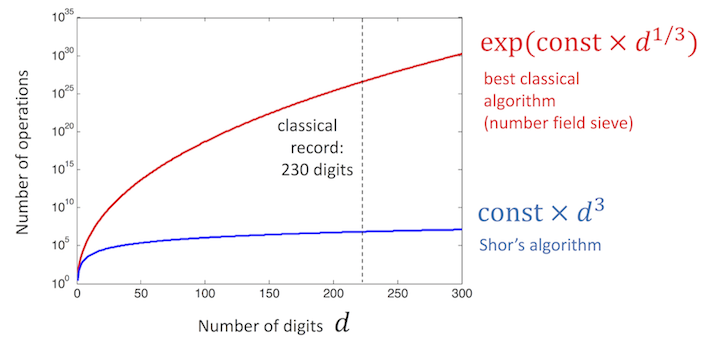

In [6]:
from IPython.display import Image
Image("shor-figure1l0qpbqeb138fr.png")


<font color='green'> 
    
##  <div style="text-align: center"> Curiouser and curiouser!” 
##### <div style="text-align: center"> _Lewis Carroll, Through the Looking Glass, 1871_</div>

</font>

In [21]:
import random
import math

### get co-primes of number N

def get_coprime(N):
    coprime = []
    for _a in range(1, N):
        if math.gcd(N, _a) == 1:
            coprime.append(_a)
    return coprime

# Brute force period finding algorithm
# x is co-prime to N
def find_period_classical(x, N):
    n = 1
    t = x
    while t != 1:
        t *= x
        t %= N
        n += 1
    return n

def find_period_classical_list(L, N):
    period_r = []
    for i in L: 
        n = 1
        t = i
        while t != 1:
            t *= i
            t %= N
            n += 1
        period_r.append(n)
    return period_r

def find_gcd_list(x,r, N):
    q = math.gcd(x**int(r/2)-1,N)
    p = math.gcd(x**int(r/2)+1,N) 
    
    return q, p

def Xfind_gcd_list(Lx, N):
    ###x_list.clear()
    x_list = []
    for index, row in Lx.iterrows():
        i = row['a']
        r = row['r']
        q = math.gcd(i**int(r/2)-1,N)
        p = math.gcd(i**int(r/2)+1,N) 
        x_list.append([q,p])
    return x_list

def co_prime(p):
    XX = get_coprime(p)
    X_list = find_period_classical_list(XX, p) ## a,r
    d = {'a': XX, 'r': X_list}
    df = pd.DataFrame(data=d)
    ### GCD
    dfx = Xfind_gcd_list(df,p)
    return df.assign(gcd = dfx[:])


In [22]:
### find co-prime of example 15 
df2  = co_prime(15)


In [23]:
df2

,a,r,gcd
0,1,1,"[15, 1]"
1,2,4,"[3, 5]"
2,4,2,"[3, 5]"
3,7,4,"[3, 5]"
4,8,4,"[3, 5]"
5,11,2,"[5, 3]"
6,13,4,"[3, 5]"
7,14,2,"[1, 15]"


In [24]:
#df2.gcd remove [ ] and clean up
df2['gcd'] = df2['gcd'].astype(str)
df2['gcd'] =  df2['gcd'].apply(lambda x: x.replace('[','').replace(']','')) 
df2['gcd'] = df2['gcd'].str.strip('[]')
df2.gcd.str.split(expand=True,)

### Produce clean DataFrame with col headers
df2 = df2.join(df2.gcd.str.split(expand=True,))
df2.drop('gcd', axis=1, inplace=True)
###df2.rename(columns={0:'(𝑎^𝑟/2-1)',1:'(𝑎^𝑟/2+1)'}, inplace=True)
# if you want to operate on multiple columns, put them in a list like so:
cols = [0]

# pass them to df.replace(), specifying each char and it's replacement:
df2[cols] = df2[cols].replace({'\$': '', ',': ''}, regex=True)
df2.rename(columns={0:'(𝑎^𝑟/2-1)',1:'(𝑎^𝑟/2+1)'}, inplace=True)


### Remember this?

>$\large \ a^r \equiv 1 \hspace{0.2cm} (mod N)\$.


>$(a^{r/2} - 1)(a^{r'2} + 1) = a^r - 1 \equiv 0 \bmod N$

>Computing GCD we obtain a factor of N

>$gcd(N,a^{r/2} \pm 1)$ Euclid

In [25]:
### DERIVED Classically looking for the factors: 3 and 5 by determining the GCD from the determination of r through period finding
df2


,a,r,(𝑎^𝑟/2-1),(𝑎^𝑟/2+1)
0,1,1,15,1
1,2,4,3,5
2,4,2,3,5
3,7,4,3,5
4,8,4,3,5
5,11,2,5,3
6,13,4,3,5
7,14,2,1,15


### QUANTUM COMPUTING EXAMPLE

### _*Shor's Algorithm for Integer Factorization*_ 


### Integer Factorization <a id='factorization'></a>
The presumed difficulty of this semiprime or co-prime factorization problem underlines many encryption algorithms, such as [RSA](https://en.wikipedia.org/wiki/Integer_factorization), which is used in online credit card transactions, amongst other applications.

KEY POINTS:
1. Probability answer
2. N qubits can store $\ 2^N$ binary numbers simultaneously, suggesting massive parallelism.




N = 2:

\begin{eqnarray} \vert\psi\rangle & =  \bigg( \vert 0 \rangle \vert 0 \rangle + \vert 0 \rangle \vert 1 \rangle + \vert 1 \rangle \vert 0 \rangle + \vert 1 \rangle \vert 1 \rangle \bigg)\ \end{eqnarray}

3. Quantum states have wave like properties that allow powerful nonclassical operations (interference and entanglement)

4. Behavior is governed by quantum mechanics
    Signal states are qubit vectors
    Operations are defined by linear algebra over Hilbert space and represented by unitary matrices
    Gates and circuits must be reversible (information-lossless) > Number of output lines = Number of input lines
    States cannot be copied so fan-out (“cloning”) is not allowed
    Many universal gate sets and physical implementation technologies exist (the best ones are not obvious)


The BAD NEWS:

1. Measurement yields just one state. The others get destroyed - the superposition collapses
2. Quantum states are very fragile due to nano scale and low energy levels and interaction with the environment - decoherence
3. Physical circuits are extreamly hard to build and fault tolerant design is belived to be essential


### Summary <a id='factorization'></a>
Quantum circuits can solve some important problems with exponentially fewer operations than classical algorithms

Small quantum circuits have been demonstrated in the lab using various physical technologies

Quantum cryptography has been demonstrated over long distances

Current technologies are fragile,and appear to be limited to tens of qubits and hundreds of gates

Big gaps remain in our understanding of quantumcircuit and algorithm design, as well as the necessary implementation techniques

### Have a look at this https://en.wikipedia.org/wiki/RSA_numbers#RSA-768

In [26]:
###Have a look at this https://en.wikipedia.org/wiki/RSA_numbers#RSA-768

### RSA KEY 232 DIGITS
RSA768  = str(1230186684530117755130494958384962720772853569595334792197322452151726400507263657518745202199786469389956474942774063845925192557326303453731548268507917026122142913461670429214311602221240479274737794080665351419597459856902143413)

In [27]:
len(RSA768)


232

In [28]:
### multiply prime factors of RSA768
A = 33478071698956898786044169848212690817704794983713768568912431388982883793878002287614711652531743087737814467999489
B = 36746043666799590428244633799627952632279158164343087642676032283815739666511279233373417143396810270092798736308917

factors_RSA768 = A * B

In [29]:
# I want to find 2 prime number when multiplied together = the number below:

factors_RSA768


1230186684530117755130494958384962720772853569595334792197322452151726400507263657518745202199786469389956474942774063845925192557326303453731548268507917026122142913461670429214311602221240479274737794080665351419597459856902143413

In [30]:
len(str(B))


116

In [31]:
import sympy
print(sympy.isprime(A), sympy.isprime(B))



True True


In [32]:
#### How manny Q-bits needed 2 + 3/2 * math.log2(N)


qubits = 2 + 3/2 * math.log2(1230186684530117755130494958384962720772853569595334792197322452151726400507263657518745202199786469389956474942774063845925192557326303453731548268507917026122142913461670429214311602221240479274737794080665351419597459856902143413)

In [33]:
### This many Qubits
qubits


1153.496400776707

### qubits needed to factor this RSA768 code
> This calculation will give the number of qubits needed for this RSA code. Number of $qubits = 2 + 3/2 * \log2(RSA768)$

>$ x^r \equiv 1 \bmod N $

In [34]:
qubits = 2 + 3/2 * math.log2(15)


In [35]:
qubits


7.860335893412778

##### Example Powers of 2

>The function $\mathcal{F}(a) = x^a \bmod N$ is a periodic function, where $x$ is an integer coprime to $N$ and $a \ge 0$.

> Powers of 2: 1,2,4,8,16,32,64,128,256,512,1024

>$ x^r \equiv 1 \bmod N $: 1 2 4 8 1 2 4 8

> N = 15

##### Theory: Eulers Congruent Theorem

>The algorithms used in quantum techniques for integer factorisation do not directly produce the factors of a given number. The quantum algorithm soves a related problem or order finding. Order finding is the task of computing the smallest period r of a function f(x). 

>Such that f(x) = f(x+r).

>Solving the order finding problem with the function $\mathcal{F}(a) \equiv x^a \bmod N$

>Allows us to solve the integer factorising problem. Find the minimum period r of the function $\mathcal{F}(a) = x^a \bmod N$ since r is the period.

>$\mathcal a^r \equiv 1 \bmod N$

> a = 1,3,7,9...any of these.



In [36]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/zNzzGgr2mhk?start=1&end=326",560,315)


In [37]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/hOlOY7NyMfs?start=75&end=126",560,315)

#### Now the Quantum Bit
>Shor's Algorithm

### <div style="text-align: center">_"Now this is not the end. It is not even the beginning of the end. But it is, perhaps, the end of the beginning._”</div>
###### <div style="text-align: center"> _Winston Churchill, November 1942_

In [38]:
import qiskit
qiskit.__qiskit_version__


{'qiskit': '0.10.3',
 'qiskit-terra': '0.8.1',
 'qiskit-ignis': '0.1.1',
 'qiskit-aer': '0.2.1',
 'qiskit-ibmq-provider': '0.2.2',
 'qiskit-aqua': '0.5.1'}

In [41]:
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import plot_histogram

In [40]:
from qiskit import *
#IBMQ.load_accounts(hub=None)


In [42]:
from qiskit.tools.jupyter import *


In [43]:
from qiskit.tools.monitor import job_monitor



Implement the modular exponentiation function $x^a \bmod N$ on the function register: \begin{eqnarray} \vert\psi2\rangle & = & \frac{1}{\sqrt{T}}\sum{a=0}^{T-1}\vert a \rangle \vert x^a \bmod N \rangle = \frac{1}{\sqrt{512}}\sum_{a=0}^{511}\vert a \rangle \vert 2^a \bmod 21 \rangle \ & = & \frac{1}{\sqrt{512}} \bigg( \;\; \vert 0 \rangle \vert 1 \rangle + \vert 1 \rangle \vert 2 \rangle + \vert 2 \rangle \vert 4 \rangle + \vert 3 \rangle \vert 8 \rangle + \;\; \vert 4 \rangle \vert 16 \rangle + \;\, \vert 5 \rangle \vert 11 \rangle \, + \ & & \;\;\;\;\;\;\;\;\;\;\;\;\;\, \vert 6 \rangle \vert 1 \rangle + \vert 7 \rangle \vert 2 \rangle + \vert 8 \rangle \vert 4 \rangle + \vert 9 \rangle \vert 8 \rangle + \vert 10 \rangle \vert 16 \rangle + \vert 11 \rangle \vert 11 \rangle \, +\ & & \;\;\;\;\;\;\;\;\;\;\;\;\, \vert 12 \rangle \vert 1 \rangle + \ldots \bigg)\ \end{eqnarray} Notice that the above expression has the following pattern: the states of the second register of each “column” are the same. Therefore we can rearrange the terms in order to collect the second register:


In [44]:
#### circuite for a range of coprimes
def circuit_amod15(qc,qr,cr,a):
    if a == 2:
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[1],qr[0])
    elif a == 7:
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])
    elif a == 8:
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[3],qr[2])
    elif a == 11: # this is included for completeness
        qc.cswap(qr[4],qr[2],qr[0])
        qc.cswap(qr[4],qr[3],qr[1])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])
    elif a == 13:
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])

In [45]:
# qc = quantum circuit, qr = quantum register, cr = classical register, a = 2, 7, 8, 11 or 13
def circuit_aperiod15(qc,qr,cr,a):
    if a == 11:
        circuit_11period15(qc,qr,cr)
        return
    
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[0])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    qc.h(qr[4])
    #   controlled unitary
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[0])
    #   feed forward
    qc.u1(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[1])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a mod 15
    qc.h(qr[4])
    #   controlled unitary.
    circuit_amod15(qc,qr,cr,a)
    #   feed forward
    qc.u1(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.u1(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.u1(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[2])

In [46]:
def circuit_11period15(qc,qr,cr):
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[0])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    #   feed forward
    qc.u1(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[1])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply 11 mod 15
    qc.h(qr[4])
    #   controlled unitary.
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[1])
    #   feed forward
    qc.u1(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.u1(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.u1(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[2])

In [43]:
#### this is not done in this demonstrtion
def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        for k in range(j):
            circ.cu1(math.pi/float(2**(j-k)), q[j], q[k])
        circ.h(q[j])

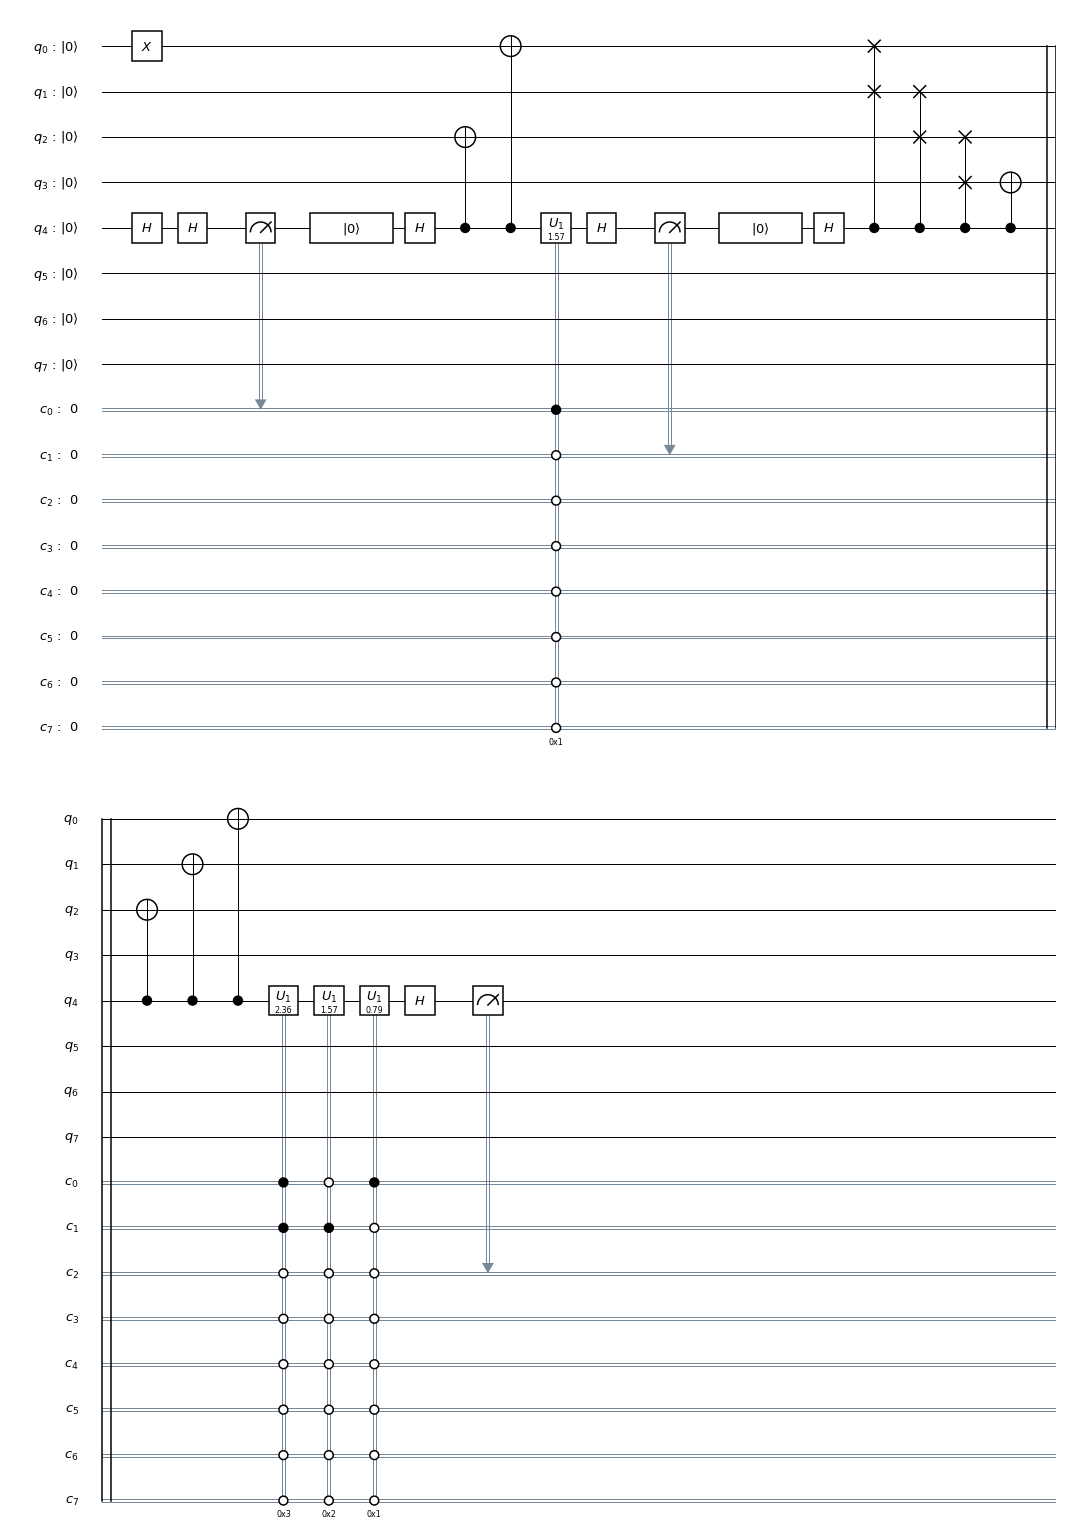

In [47]:
q = QuantumRegister(8, 'q')
c = ClassicalRegister(8, 'c')

shor = QuantumCircuit(q, c)
circuit_aperiod15(shor,q,c,7)
shor.draw(output='mpl')


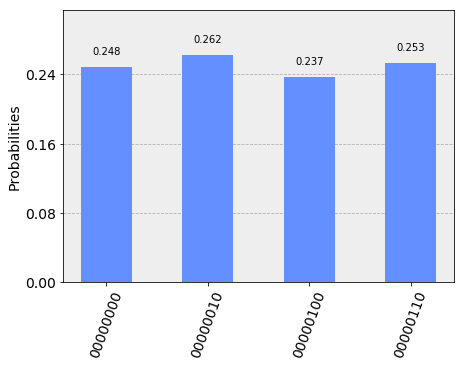

In [51]:
backend = BasicAer.get_backend('qasm_simulator')
sim_job = execute([shor], backend)
sim_result = sim_job.result()
sim_data = sim_result.get_counts(shor) 
plot_histogram(sim_data)

We see the measurements yield $x = 0, 2, 4$ and $6$ with about equal(ish) probability. 

Using the continued fraction expansion for $x/2^3$, Not shown THIS WOULD NORMALLY BE OBTAINED USING A FOURIER TRANSFORM

we note that only $x = 2$ and $6$ give the correct period $r = 4$, and thus the 
### factors $p = \text{gcd}(a^{r/2}+1,15) = 3$ and $q = \text{gcd}(a^{r/2}-1,15) = 5$.


Could try seeing what you get for $a = 2, 8, 11, 13$?

In [52]:
a = 11 ##  2, 4, 7, 8, 11, 13, 14. #### searh for the best from above
r = 4 ## test and try

list = [2, 4, 7, 8, 11, 13, 14]
for i in list: 
    N = int(i**(r/2))
    print("PRIME -->", math.gcd(N - 1, 15), "PRIME -->",math.gcd(N + 1, 15))

###N = int(a**(r/2))
###print("PRIME -->", math.gcd(N - 1, 15), "PRIME -->",math.gcd(N + 1, 15))

PRIME --> 3 PRIME --> 5
PRIME --> 15 PRIME --> 1
PRIME --> 3 PRIME --> 5
PRIME --> 3 PRIME --> 5
PRIME --> 15 PRIME --> 1
PRIME --> 3 PRIME --> 5
PRIME --> 15 PRIME --> 1


 
## <font color='green'> Another Example </font>

Let's factorize $N = 21$ with coprime $x=2$, following the above steps of the quantum period finding algorithm, which should return $r = 6$. This example follows one from this tutorial.
Choose $T = 2^t$ such that $N^2 \leq T \le 2N^2$. For $N = 21$, the smallest value of $t$ is 9, meaning $T = 2^t = 512$. Initialise two registers of qubits, first an argument register with $t = 9$ qubits, and second a function register with $n = log_2 N = 5$ qubits: $$\vert\psi_0\rangle = \vert 0 \rangle \vert 0 \rangle$$
Apply a Hadamard gate on each of the qubits in the argument register: $$\vert\psi_1\rangle = \frac{1}{\sqrt{T}}\sum_{a=0}^{T-1}\vert a \rangle \vert 0 \rangle = \frac{1}{\sqrt{512}}\sum_{a=0}^{511}\vert a \rangle \vert 0 \rangle$$
Implement the modular exponentiation function $x^a \bmod N$ on the function register: \begin{eqnarray} \vert\psi2\rangle & = & \frac{1}{\sqrt{T}}\sum{a=0}^{T-1}\vert a \rangle \vert x^a \bmod N \rangle = \frac{1}{\sqrt{512}}\sum_{a=0}^{511}\vert a \rangle \vert 2^a \bmod 21 \rangle \ & = & \frac{1}{\sqrt{512}} \bigg( \;\; \vert 0 \rangle \vert 1 \rangle + \vert 1 \rangle \vert 2 \rangle + \vert 2 \rangle \vert 4 \rangle + \vert 3 \rangle \vert 8 \rangle + \;\; \vert 4 \rangle \vert 16 \rangle + \;\, \vert 5 \rangle \vert 11 \rangle \, + \ & & \;\;\;\;\;\;\;\;\;\;\;\;\;\, \vert 6 \rangle \vert 1 \rangle + \vert 7 \rangle \vert 2 \rangle + \vert 8 \rangle \vert 4 \rangle + \vert 9 \rangle \vert 8 \rangle + \vert 10 \rangle \vert 16 \rangle + \vert 11 \rangle \vert 11 \rangle \, +\ & & \;\;\;\;\;\;\;\;\;\;\;\;\, \vert 12 \rangle \vert 1 \rangle + \ldots \bigg)\ \end{eqnarray} Notice that the above expression has the following pattern: the states of the second register of each “column” are the same. Therefore we can rearrange the terms in order to collect the second register: $$\begin{eqnarray}
\vert\psi_2\rangle 
&amp; = &amp; \frac{1}{\sqrt{512}} \bigg[ \big(\,\vert 0 \rangle + \;\vert 6 \rangle + \vert 12 \rangle \ldots + \vert 504 \rangle + \vert 510 \rangle \big) \, \vert 1 \rangle \, + \
&amp; &amp; \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 1 \rangle + \;\vert 7 \rangle + \vert 13 \rangle \ldots + \vert 505 \rangle + \vert 511 \rangle \big) \, \vert 2 \rangle \, + \
&amp; &amp; \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 2 \rangle + \;\vert 8 \rangle + \vert 14 \rangle \ldots + \vert 506 \rangle +  \big) \, \vert 4 \rangle \, +  \
&amp; &amp; \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 3 \rangle + \;\vert 9 \rangle + \vert 15 \rangle \ldots + \vert 507 \rangle +  \big) \, \vert 8 \rangle \, +  \
&amp; &amp; \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 4 \rangle + \vert 10 \rangle + \vert 16 \rangle \ldots + \vert 508 \rangle +  \big)  \vert 16 \rangle \, +  \
&amp; &amp; \;\;\;\;\;\;\;\;\;\;\; \big(\,\vert 5 \rangle + \vert 11 \rangle + \vert 17 \rangle \ldots + \vert 509 \rangle +  \big)  \vert 11 \rangle \, \bigg]\
\end{eqnarray}$$
To simplify following equations, we'll measure the function register before performing a quantum Fourier transform on the argument register. This will yield one of the following numbers with equal probability: $\{1,2,4,6,8,16,11\}$. Suppose that the result of the measurement was $2$, then: $$\vert\psi_3\rangle = \frac{1}{\sqrt{86}}(\vert 1 \rangle + \;\vert 7 \rangle + \vert 13 \rangle \ldots + \vert 505 \rangle + \vert 511 \rangle)\, \vert 2 \rangle $$ It does not matter what is the result of the measurement; what matters is the periodic pattern. The period of the states of the first register is the solution to the problem and the quantum Fourier transform can reveal the value of the period.
Perform a quantum Fourier transform on the argument register: $$
\vert\psi_4\rangle
= QFT(\vert\psi_3\rangle)
= QFT(\frac{1}{\sqrt{86}}\sum_{a=0}^{85}\vert 6a+1 \rangle)\vert 2 \rangle
= \frac{1}{\sqrt{512}}\sum_{j=0}^{511}\bigg(\big[ \frac{1}{\sqrt{86}}\sum_{a=0}^{85} e^{-2 \pi i \frac{6ja}{512}} \big] e^{-2\pi i\frac{j}{512}}\vert j \rangle \bigg)\vert 2 \rangle
$$
Measure the argument register. The probability of measuring a result $j$ is: $$ \rm{Probability}(j) = \frac{1}{512 \times 86} \bigg\vert \sum_{a=0}^{85}e^{-2 \pi i \frac{6ja}{512}} \bigg\vert^2$$ This peaks at $j=0,85,171,256,341,427$. Suppose that the result of the measement yielded $j = 85$, then using continued fraction approximation of $\frac{512}{85}$, we obtain $r=6$, as expected.


In [22]:
import math


def cf(n, d):
    """Return the terms of the continued fraction when n is the numerator
and d the divisor as a list"""
    if d == 0: return []         # Ok it is finished
    q = n//d                     # compute the integer quotient
    r = n - q*d                  # the rest
    return [q] + cf(d, r) 

In [75]:
a = cf(85, 512)

##print(cf(427, 512))

In [74]:
ro = 1
r1 = a[1]
do = a[0]
d1 = 1 + a[0]*a[1]
d2 = a[2]*d1+do
r2 = a[2]*r1 + ro
d3 = a[3]*d2 + d1
r3 = a[3]* r2 + r1
##d4 = a[4]*d3 + d2
##r4 = a[4]*r3 + r2


In [76]:
a

[0, 6, 42, 2]

In [83]:
d2

5

In [84]:
r2

6

###  <div style="text-align: center"> Have I gone mad?
###  <div style="text-align: center"> I'm afraid so, but let me tell you something, the best people usualy are.” 
##### <div style="text-align: center"> _Lewis Carroll, Through the Looking Glass, 1871_</div>
</font>

In [3]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [4]:
!jt -t grade3 -T -N

In [5]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

In [25]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')


In [27]:
# import jtplot module in notebook
from jupyterthemes import jtplot


# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))


In [ ]:
# reset default matplotlib rcParams
# import jtplot module in notebook
from jupyterthemes import jtplot
jtplot.reset()

In [2]:
!pip list | grep pandas

pandas                0.24.2     
